# Iris Species Dataset - 4 ML Models

## Load The Data and Import Libraries

In [148]:
import numpy as np                          
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/iris/Iris.csv
/kaggle/input/iris/database.sqlite


In [149]:
data=pd.read_csv("/kaggle/input/iris/Iris.csv")
data.drop('Id',axis=1,inplace=True)
data.head(3)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa


In [150]:
data.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [151]:
data.info() #no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


## Exploratory Data Analysis & Inputs Distibution

### Group By Outputs

In [152]:
setosa = data[data.Species=="Iris-setosa"]
versicolor = data[data.Species=="Iris-versicolor"]
virginica = data[data.Species=="Iris-virginica"]

### Relationship Between The Sepal Length And Width

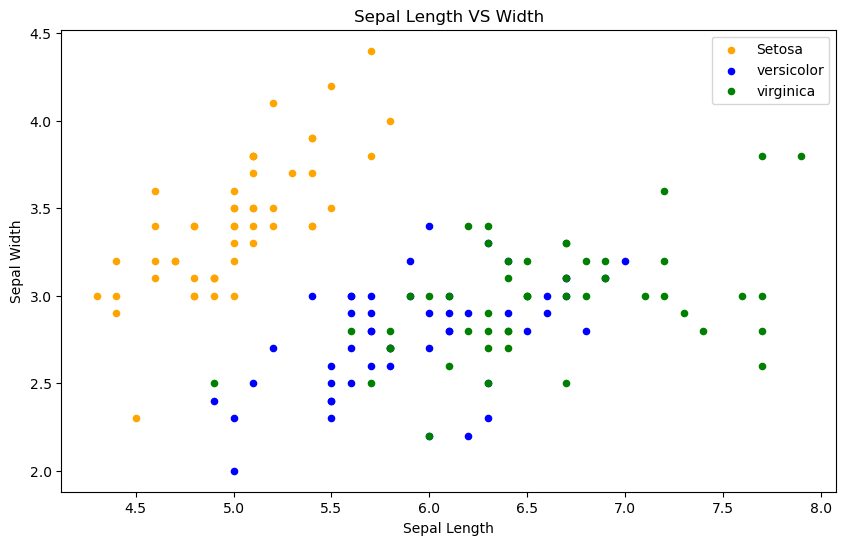

In [153]:
s=setosa.plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='orange', label='Setosa')
versicolor.plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='blue', label='versicolor',ax=s)
virginica.plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='green', label='virginica', ax=s)
s.set_xlabel("Sepal Length")
s.set_ylabel("Sepal Width")
s.set_title("Sepal Length VS Width")
s=plt.gcf()
s.set_size_inches(10,6)
plt.show()

### Relationship Between the Petal Length and Width

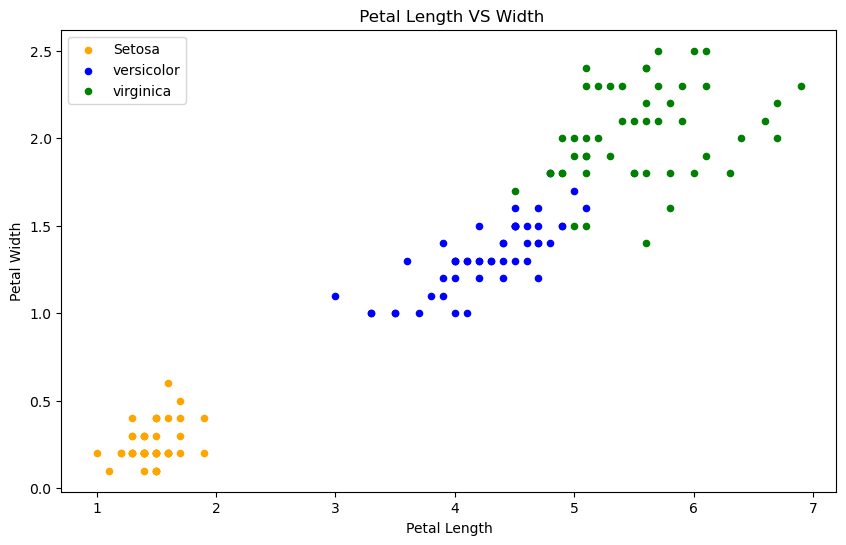

In [154]:
s=setosa.plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='orange', label='Setosa')
versicolor.plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='blue', label='versicolor',ax=s)
virginica.plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='green', label='virginica', ax=s)
s.set_xlabel("Petal Length")
s.set_ylabel("Petal Width")
s.set_title(" Petal Length VS Width")
s=plt.gcf()
s.set_size_inches(10,6)
plt.show()

We can see that the Petal Features are giving a better cluster division compared to the Sepal features.

### Distribution Of Length And Width

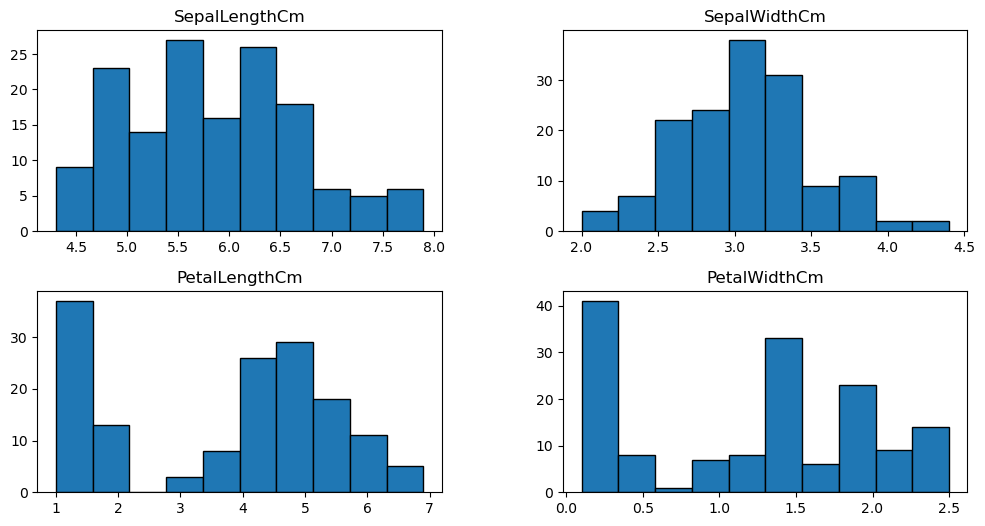

In [155]:
data.hist(edgecolor='black', linewidth=1, grid=0)
s=plt.gcf()
s.set_size_inches(12,6)
plt.show()

### Length And Width According to The Species

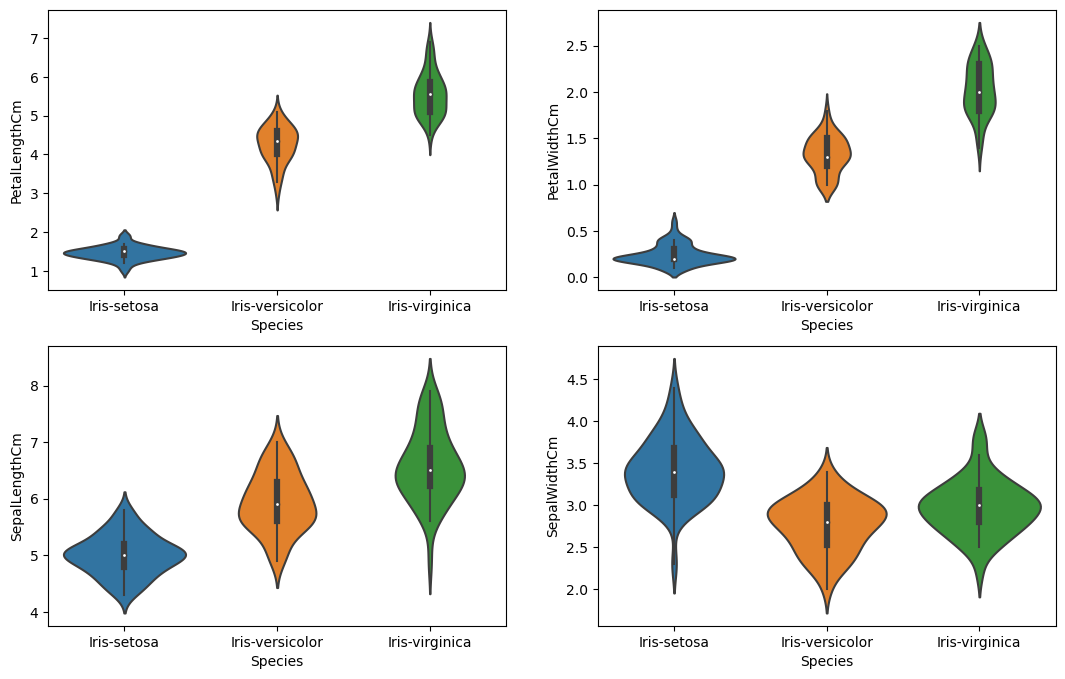

In [156]:
plt.figure(figsize=(13,8))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='PetalLengthCm',data=data)
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='PetalWidthCm',data=data)
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='SepalLengthCm',data=data)
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='SepalWidthCm',data=data)

plt.show()

## Find The Best Classification Algorithms To Build a Model

### Import The Necessary ML Libraries

In [157]:
from sklearn.linear_model import LogisticRegression  # Logistic Regression 
from sklearn.model_selection import train_test_split # Split the dataset for training and testing
from sklearn.neighbors import KNeighborsClassifier  # K nearest neighbours
from sklearn import svm  #Support Vector Machine (SVM) 
from sklearn import metrics # Model accuracy
from sklearn.tree import DecisionTreeClassifier #Decision Tree Algoithm

### Features (Inputs) Correlation 

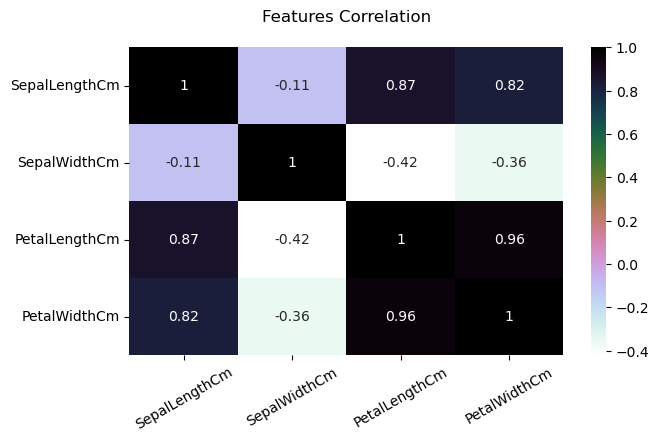

In [158]:
plt.figure(figsize=(7,4)) 
sns.heatmap(data.corr(),annot=True,cmap='cubehelix_r')
plt.title("Features Correlation\n")
plt.xticks(rotation=30)
plt.show()


Observatiom: The Sepal Width and Length are not correlated The Petal Width and Length are correlated

### Split Train / Test Data

In [159]:
data.shape

(150, 5)

In [160]:
from sklearn import preprocessing
x =data.iloc[:,0:4]
y= data.Species

le = preprocessing.LabelEncoder()
le.fit(y)
y = le.transform(y)

In [161]:
train_x, test_x,train_y, test_y = train_test_split(x,y, test_size = 0.3)

In [162]:
print(" Test Data samples: ",test_x.shape[0])
print(" Train Data samples : ", train_x.shape[0])

 Test Data samples:  45
 Train Data samples :  105


## Logistic Regression

In [163]:
model = LogisticRegression()
model.fit(train_x , train_y)
predict1 = model.predict(test_x )
print('Logistic Regression accuracy:',metrics.accuracy_score(predict1,test_y).round(2))

Logistic Regression accuracy: 0.96


## Support Vector Machine (SVM)

In [164]:
model = svm.SVC()
model.fit(train_x , train_y)
predict2 = model.predict(test_x )
print('SVM accuracy:',metrics.accuracy_score(predict2,test_y).round(2))

SVM accuracy: 0.98


## Decision Tree

In [165]:
model=DecisionTreeClassifier()
model.fit(train_x , train_y)
predict3 = model.predict(test_x )
print('Decision Tree accuracy:',metrics.accuracy_score(predict3,test_y).round(2))

Decision Tree accuracy: 0.93


## K-Nearest Neighbours

In [166]:
model=KNeighborsClassifier(n_neighbors=5)
model.fit(train_x , train_y)
predict4 = model.predict(test_x )
print('Decision Tree accuracy:',metrics.accuracy_score(predict4,test_y).round(2))

Decision Tree accuracy: 0.93


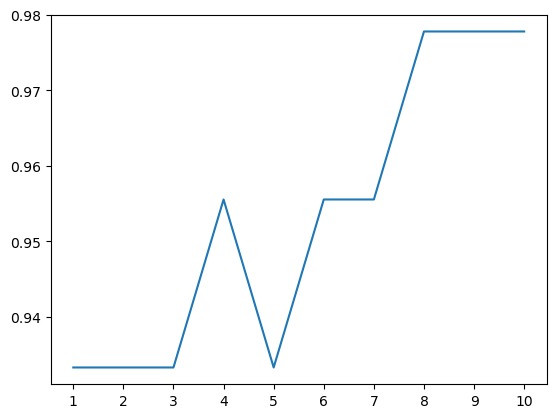

In [167]:
a_index=list(range(1,11))
a=pd.Series(dtype="int64")
x=[1,2,3,4,5,6,7,8,9,10]
for i in range(1,11):
    model = KNeighborsClassifier(n_neighbors=i) 
    model.fit(train_x, train_y)
    prediction= model.predict(test_x)
    a=a.append(pd.Series(metrics.accuracy_score(prediction,test_y)))
plt.plot(a_index, a)
plt.xticks(x)
plt.show()

## Examen Accuracy On Petals and Sepals Seperately

In [168]:
petal_x=data[['PetalLengthCm','PetalWidthCm',]]
petal_y=data.Species

sepal_x=data[['SepalLengthCm','SepalWidthCm']]
sepal_y=data.Species

In [169]:
X_train , X_test , y_train,y_test = train_test_split(petal_x,petal_y,test_size=0.3,random_state=0)
X_train1 , X_test1 , y_train1,y_test1 = train_test_split(sepal_x,sepal_y,test_size=0.3,random_state=0)

## SVM

In [170]:
model=svm.SVC()
model.fit(X_train , y_train) 
prediction=model.predict(X_test) 
print('Accuracy of the SVM using Petals is:',metrics.accuracy_score(prediction,y_test).round(2))

model=svm.SVC()
model.fit(X_train1 , y_train1) 
prediction=model.predict(X_test1) 
print('Accuracy of the SVM using Sepal is:',metrics.accuracy_score(prediction,y_test1))

Accuracy of the SVM using Petals is: 0.98
Accuracy of the SVM using Sepal is: 0.8


## Logistic Regression

In [171]:
model = LogisticRegression()
model.fit(X_train , y_train) 
prediction=model.predict(X_test) 
print('Accuracy of the Logistic Regression using Petals is:',metrics.accuracy_score(prediction,y_test).round(2))

model = LogisticRegression()
model.fit(X_train1 , y_train1) 
prediction=model.predict(X_test1) 
print('Accuracy of Logistic Regression using Sepal is:',metrics.accuracy_score(prediction,y_test1).round(2))

Accuracy of the Logistic Regression using Petals is: 0.98
Accuracy of Logistic Regression using Sepal is: 0.82


## Decision Tree

In [172]:
model=DecisionTreeClassifier()
model.fit(X_train , y_train) 
prediction=model.predict(X_test) 
print('Accuracy of Decision Tree using Petals is:',metrics.accuracy_score(prediction,y_test).round(2))

model = DecisionTreeClassifier()
model.fit(X_train1 , y_train1) 
prediction=model.predict(X_test1) 
print('Accuracy of Decision Tree Sepal is:',metrics.accuracy_score(prediction,y_test1).round(2))

Accuracy of Decision Tree using Petals is: 0.96
Accuracy of Decision Tree Sepal is: 0.67


## K-Nearest Neighbours

In [173]:
model=KNeighborsClassifier(n_neighbors=8) 
model.fit(X_train , y_train) 
prediction=model.predict(X_test) 
print('Accuracy of K-Nearest Neighbours using Petals is:',metrics.accuracy_score(prediction,y_test).round(2))

model=KNeighborsClassifier(n_neighbors=8) 
model.fit(X_train1 , y_train1) 
prediction=model.predict(X_test1) 
print('Accuracy of K-Nearest Neighbours using Sepal is:',metrics.accuracy_score(prediction,y_test1).round(2))

Accuracy of K-Nearest Neighbours using Petals is: 0.98
Accuracy of K-Nearest Neighbours using Sepal is: 0.73


Observations:Using Petals over Sepal for training the data gives a much better accuracy.